In [2]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import glob, os, sys, re, math, random
import xml.etree.ElementTree as ET
from rules import *
from predict import *
from raven_data import *
from tqdm.notebook import tqdm

['constant', 'progression', 'arithmetic', 'distribute_three', 'noise']


target 4 1
structure ['Scene' 'Out_In' 'Out' 'Out_Center_Single' '/' '/' 'In'
 'In_Distribute_Four' '/' '/' '/' '/'] 12
meta_target [1 1 0 1 1 1 1 1 1] 9
meta_structure [0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1] 21


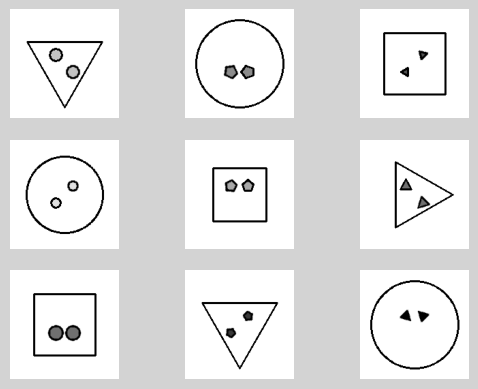

Correct answer: 4


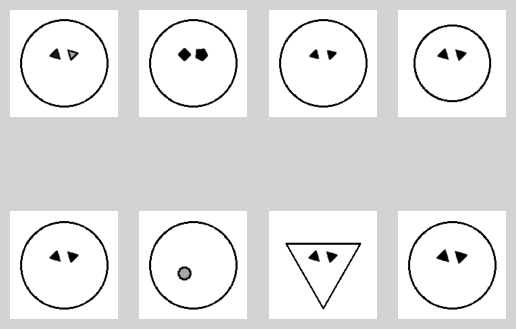

['Type', 'Size', 'Color', 'Angle', 'Position', 'ActualSize', 'Type', 'Size', 'Color', 'Angle', 'Position', 'ActualSize', 'Type', 'Size', 'Color', 'Angle', 'Position', 'ActualSize']
[[1, 4, 0, 7, [0.5, 0.5], [1, 1]], [5, 4, 2, 4, [0.58, 0.58], [0.15, 0.15]], [5, 4, 2, 5, [0.42, 0.42], [0.15, 0.15]]]
[[5, 4, 0, 7, [0.5, 0.5], [1, 1]], [3, 5, 4, 4, [0.58, 0.42], [0.15, 0.15]], [3, 5, 4, 5, [0.58, 0.58], [0.15, 0.15]]]
[[2, 4, 0, 7, [0.5, 0.5], [1, 1]], [1, 2, 6, 4, [0.42, 0.58], [0.15, 0.15]], [1, 2, 6, 5, [0.58, 0.42], [0.15, 0.15]]]
[[5, 3, 0, 1, [0.5, 0.5], [1, 1]], [5, 2, 1, 6, [0.42, 0.58], [0.15, 0.15]], [5, 2, 1, 3, [0.58, 0.42], [0.15, 0.15]]]
[[2, 3, 0, 1, [0.5, 0.5], [1, 1]], [3, 4, 3, 6, [0.42, 0.42], [0.15, 0.15]], [3, 4, 3, 3, [0.42, 0.58], [0.15, 0.15]]]
[[1, 3, 0, 1, [0.5, 0.5], [1, 1]], [1, 5, 5, 6, [0.58, 0.58], [0.15, 0.15]], [1, 5, 5, 3, [0.42, 0.42], [0.15, 0.15]]]
[[2, 4, 0, 7, [0.5, 0.5], [1, 1]], [5, 5, 5, 0, [0.58, 0.42], [0.15, 0.15]], [5, 5, 5, 4, [0.58, 0.58], [

In [49]:
path = '../RAVEN/new_data_0'
subtype = '*'
items = sorted([x.split('.xml')[0] for x in glob.glob(os.path.join(path, subtype, '*.xml'))])
correct = 0
total = 0
debug=True
global_counts = [0 for _ in rule_order]
if debug:
    # items=['../RAVEN/new_data_0/center_single/RAVEN_15_train']
    # items=['../RAVEN/new_data_0/in_center_single_out_center_single/RAVEN_15_train']
    # items=['../RAVEN/new_data_0/distribute_four/RAVEN_15_train']
    # items=['../RAVEN/new_data_0/distribute_nine/RAVEN_15_train']
    items=['../RAVEN/new_data_0/in_distribute_four_out_center_single/RAVEN_15_train']
for index, item in enumerate(items):
# for index, item in tqdm(enumerate(items), total=len(items)):
    embeddings, embedding_names, answer = load_question3(item, parse_mask=False, display=debug, debug=False)
    # embeddings, embedding_names, answer = load_question3(item, parse_mask=True, display=debug, debug=False)
    if debug:
        print(embedding_names)
        # print(embeddings)
        for i in range(8):
            print(embeddings[i])
        print(answer)
        print(embeddings[8+answer])

    # Convert the list of embeddings of each shape across the grid instead to a list of shapes and their embeddings across the grid
    # For each shape in the first cell, find the corresponding shape in the second cell and so on

    # Note: some shapes are members of a bitwise array, so we need to group them together as a single shape with the BW tag
    shapes = define_shapes_ruled(embeddings, embedding_names, debug=debug)
    try:
        assert_properties(shapes, embeddings, answer)
    except Exception as e:
        print("Error!", item, " has embeddings of different lengths")
        print(e)
        load_question3(item, parse_mask=True, display=True, debug=True)
        assert_properties(shapes, embeddings, answer, debug=True)
        raise e
    if debug:
        print("Shapes", len(shapes))
        for shape in shapes:
            for indices in [(0,1,2),(3,4,5),(6,7)]:
                print(" ".join(str(shape[i]) for i in indices))
            print()

    # if any(len(embedding) != len(embeddings[0]) for embedding in embeddings):
    #     print("Error!", item, " has embeddings of different lengths")
    #     break

    # guess = predict_shapes(shapes, embeddings, debug=debug)
    total += 1
    # if guess == answer:
    #     correct += 1
    #     if debug:
    #         print("Guessed correct answer", answer, embeddings[8+answer])
    # else:
    #     if debug:
    #         grid = [[0, 1, 2], [3, 4, 5], [6, 7, None]]
    #         print("\n".join([str([embeddings[col] if col is not None else None for col in row ]) for row in grid]))
    #         print("Answer", answer, embeddings[8+answer], "Guess", guess, embeddings[8+guess] if guess is not None else None)
    #     print("WRONG",item, "Wrong guess", guess, "Correct answer", answer)
print("Correct", correct, "Total", total, "Accuracy", correct/total)

In [14]:
# Test cases:
# 1. Rotating shifting angle bar (iq 4)
embeddings = [
    # pos, size, color, shape, angle
    [[[0.5, 0.5], [0.75, 0.05], 0, 4, 0], [[0.75, 0.5], [0.1, 0.2], 0, 4, 0]],
    [[[0.5, 0.5], [0.75, 0.05], 0, 4, 0], [[0.5, 0.5], [0.1, 0.2], 0, 4, 0]],
    [[[0.5, 0.5], [0.75, 0.05], 0, 4, 0], [[0.25, 0.5], [0.1, 0.2], 0, 4, 0]],

    [[[0.5, 0.5], [0.75, 0.05], 0, 4, 45], [[0.75, 0.75], [0.1, 0.2], 0, 4, 45]],
    [[[0.5, 0.5], [0.75, 0.05], 0, 4, 45], [[0.5, 0.5], [0.1, 0.2], 0, 4, 45]],
    [[[0.5, 0.5], [0.75, 0.05], 0, 4, 45], [[0.25, 0.25], [0.1, 0.2], 0, 4, 45]],

    [[[0.5, 0.5], [0.75, 0.05], 0, 4, 90], [[0.5, 0.75], [0.1, 0.2], 0, 4, 90]],
    [[[0.5, 0.5], [0.75, 0.05], 0, 4, 90], [[0.5, 0.5], [0.1, 0.2], 0, 4, 90]],
    # [[[0.5, 0.5], [0.75, 0.05], 0, 4, 90], [[0.5, 0.25], [0.1, 0.2], 0, 4, 90]],

    [[[0.5, 0.5], [0.75, 0.05], 0, 4, -45], [[0.75, 0.25], [0.1, 0.2], 0, 4, -45]], # A
    [[[0.5, 0.5], [0.75, 0.05], 0, 4, 90], [[0.5, 0.5], [0.1, 0.2], 0, 4, 90]],     # B
    [[[0.5, 0.5], [0.75, 0.05], 0, 4, 0], [[0.25, 0.5], [0.1, 0.2], 0, 4, 0]],      # C
    [[[0.5, 0.5], [0.75, 0.05], 0, 4, 0], [[0.5, 0.5], [0.1, 0.2], 0, 4, 0]],       # D
    [[[0.5, 0.5], [0.75, 0.05], 0, 4, 45], [[0.25, 0.25], [0.1, 0.2], 0, 4, 45]],   # E
    [[[0.5, 0.5], [0.75, 0.05], 0, 4, 90], [[0.5, 0.25], [0.1, 0.2], 0, 4, 90]],    # F

]
shapes = [[embeddings[grid_index][shape_index] for grid_index in range(8) for shape_index in range(2)]]
